### IMPORT LIBRARY

In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
# Machine Learning Models

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix


### READ DATA

In [2]:
data_train = pd.read_csv('Data Train.csv')
data_test = pd.read_csv('Data Test.csv')

In [3]:
data_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

### Exploratory Data Analysis

In [5]:
data_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [40]:
data_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [42]:
print(f"Training data has: {data_train.shape[0]} rows and {data_train.shape[1]} columns")
train = data_train.drop_duplicates()
print(f"Train data after removing duplicates: {train.shape[0]} rows and {train.shape[1]} columns")

Training data has: 4250 rows and 20 columns
Train data after removing duplicates: 4250 rows and 20 columns


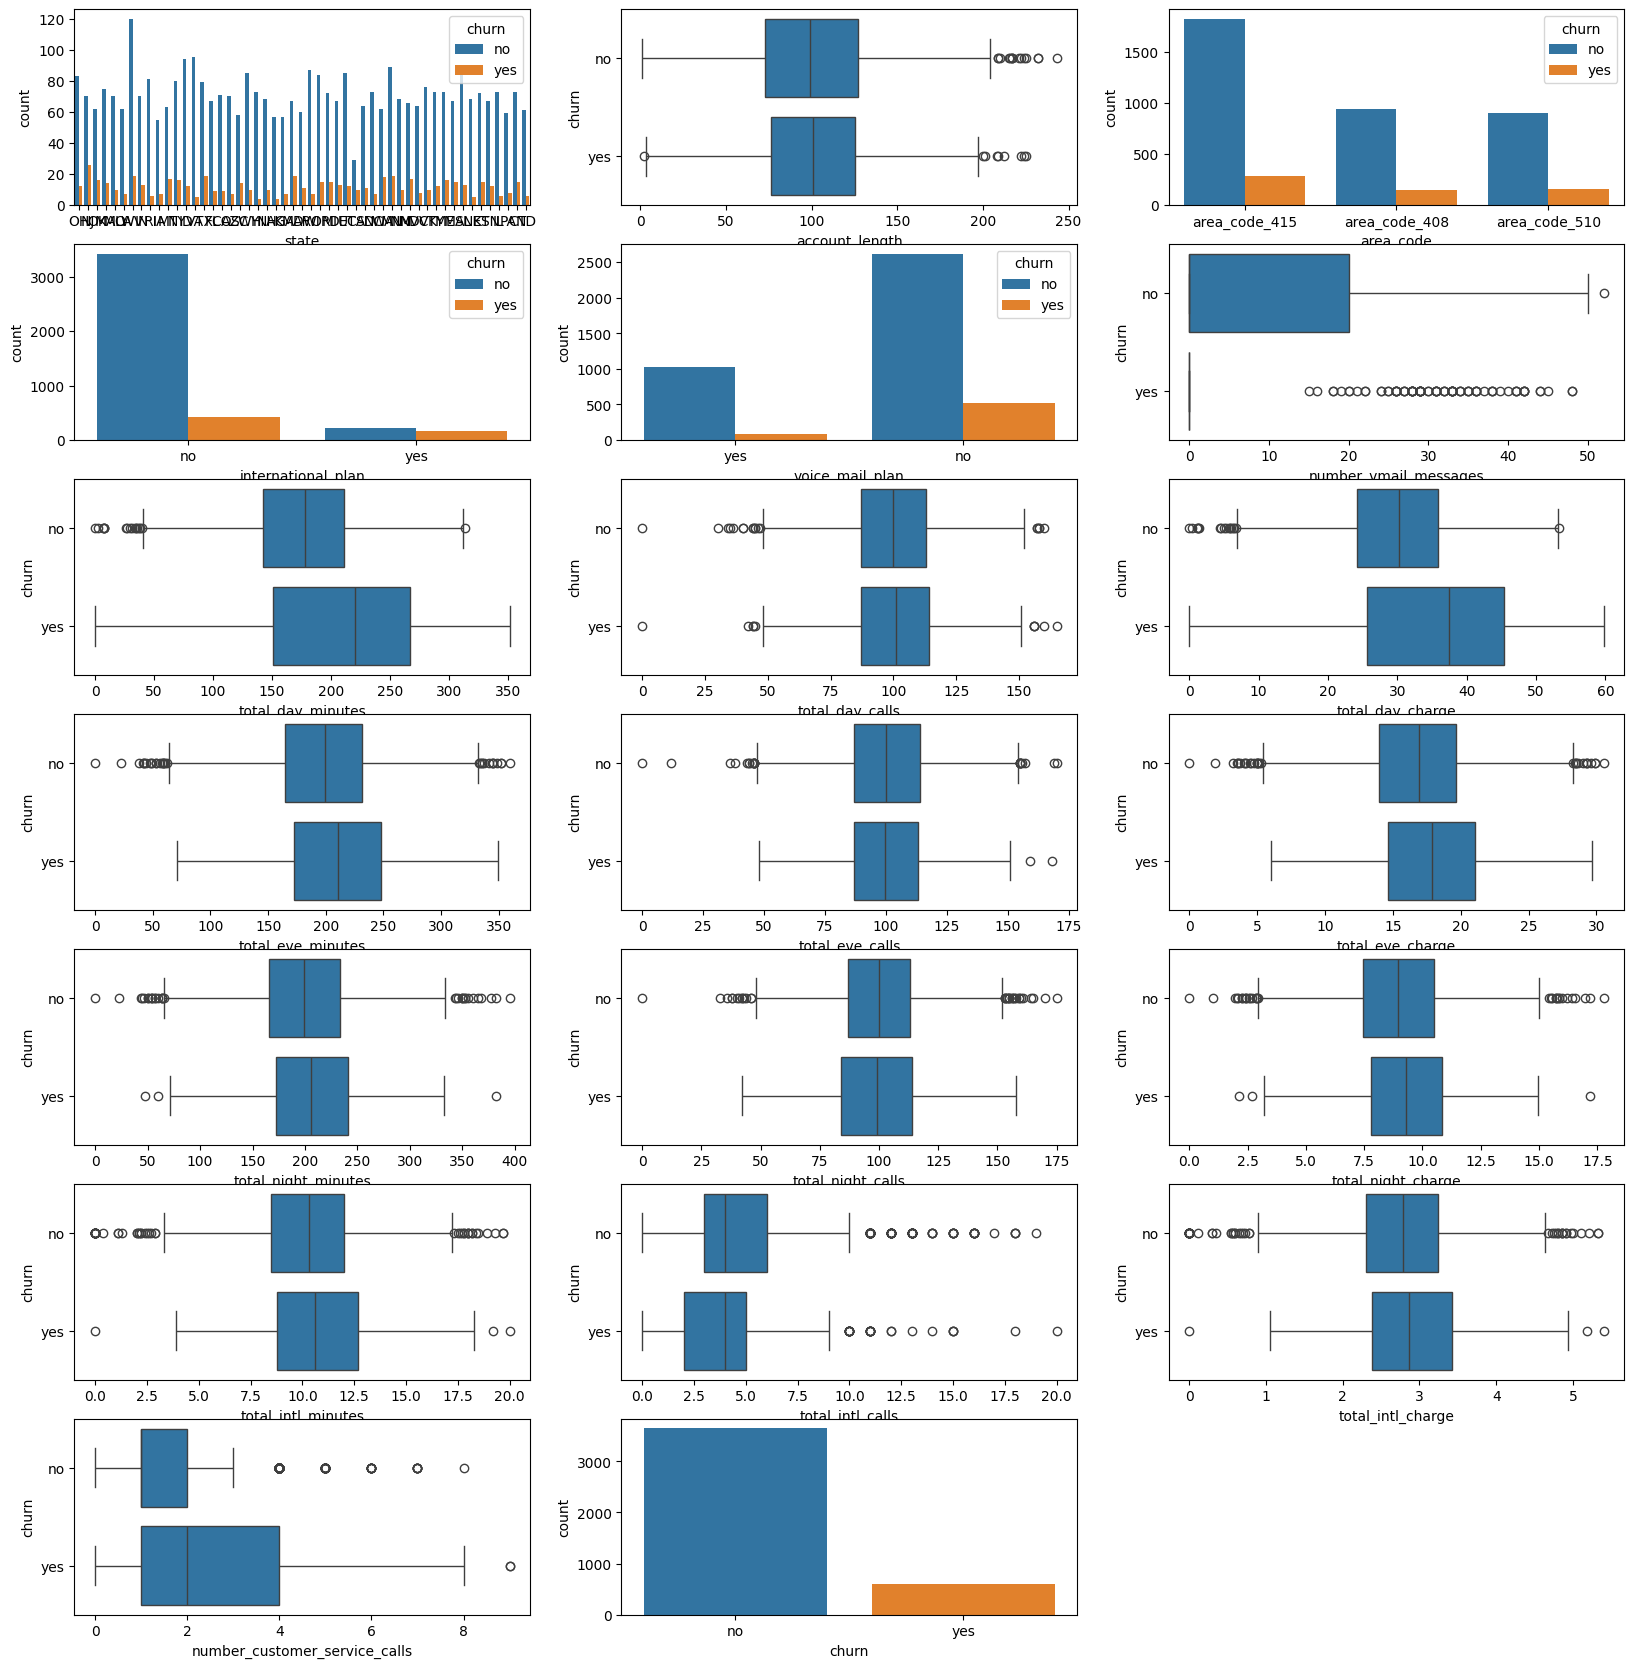

<Figure size 640x480 with 0 Axes>

In [6]:
cols = data_train.columns.tolist()
data_train.churn *= 1

plt.figure(figsize=(20, 30))

for i, variable in enumerate(data_train.columns.tolist()):
    plt.subplot(10, 3, i + 1)
    if data_train.dtypes[variable]=='object':
        sns.countplot(data=data_train, x=variable, hue='churn')
        # plt.savefig('object.png')

    else:
        sns.boxplot(data=data_train, x=variable, y=data_train['churn'].astype('str'))
        # plt.savefig('str.png')

plt.show()
plt.savefig('boxplot.png')


In [7]:
# Check number of duplicates while ignoring the index feature
n_duplicates = data_train.drop(labels=["state"], axis=1).duplicated().sum()
print(f"Sepertinya Anda memiliki {n_duplicates} duplikat pada dataset.")

Sepertinya Anda memiliki 0 duplikat pada dataset.


C:\Users\mduma\AppData\Local\Temp\ipykernel_4404\2943094529.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i-0.1, survived[i]+0.005, f"{survived[i]*100:.2f}%")


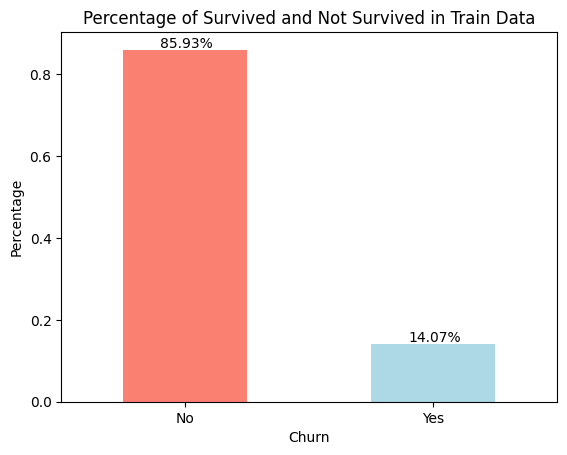

In [8]:
survived = data_train['churn'].value_counts(normalize=True)
survived.plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Percentage of Survived and Not Survived in Train Data')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
# Add data labels above the bars
for i in range(len(survived)):
    plt.text(i-0.1, survived[i]+0.005, f"{survived[i]*100:.2f}%")
plt.show()

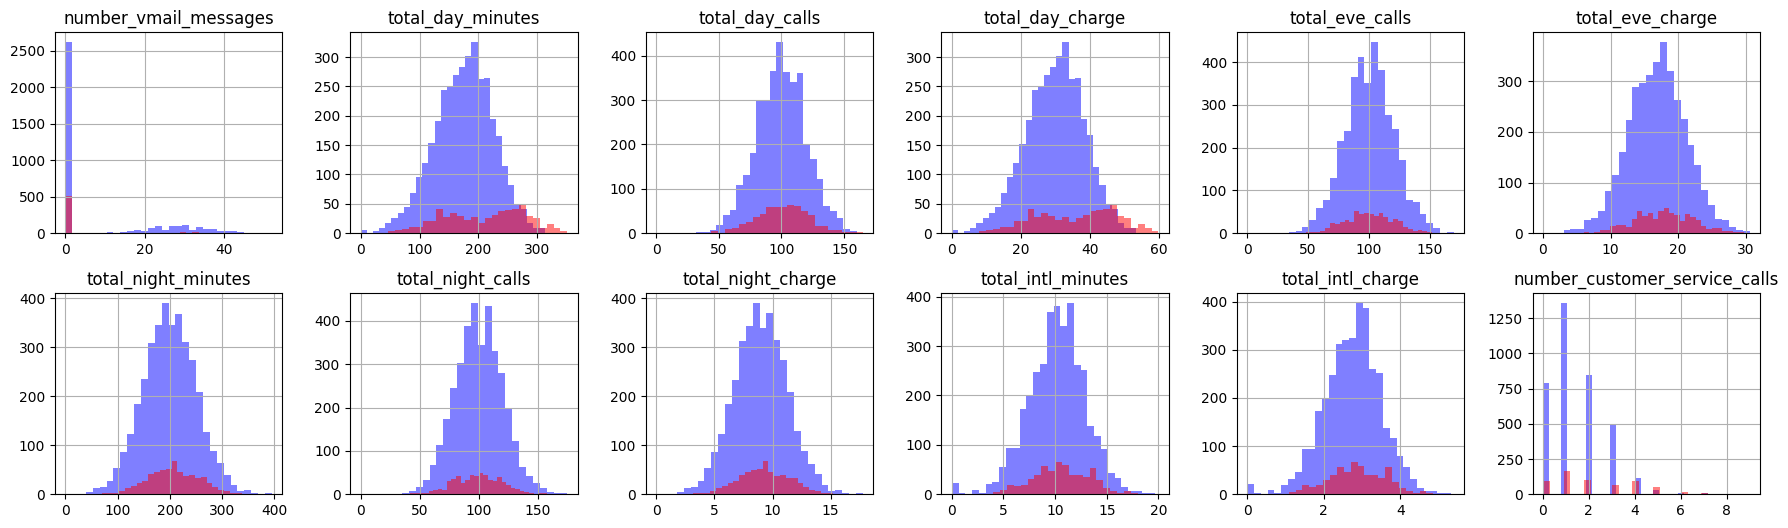

In [9]:
pred_vars = ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
             'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
             'total_night_charge', 'total_intl_minutes',
             'total_intl_charge', 'number_customer_service_calls']

fig, ax = plt.subplots(2, 6, figsize=(22, 6));
data_train[data_train.churn == 'no'][pred_vars].hist( bins=30, color="blue", alpha=0.5, ax=ax);
data_train[data_train.churn == 'yes'][pred_vars].hist( bins=30, color="red", alpha=0.5, ax=ax);

In [10]:
data_train.churn.map(dict(yes=True, no=False)).mean()
data_train['churn'] = data_train['churn'].map(dict(yes=True, no=False))
data_train['churn'].head()

0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool

In [11]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['percentage'] = tab[1] / tab['All'] * 100
    tab.columns = [var, 'churn_no', 'churn_yes', 'total', 'churn Percentage']
    return tab
data_train['area_code'] = data_train['area_code'].astype('category')


,area_code,churn_no,churn_yes,total,churn Percentage
0,area_code_408,934,152,1086,13.996317
1,area_code_415,1821,287,2108,13.614801
2,area_code_510,897,159,1056,15.056818
3,All,3652,598,4250,14.070588


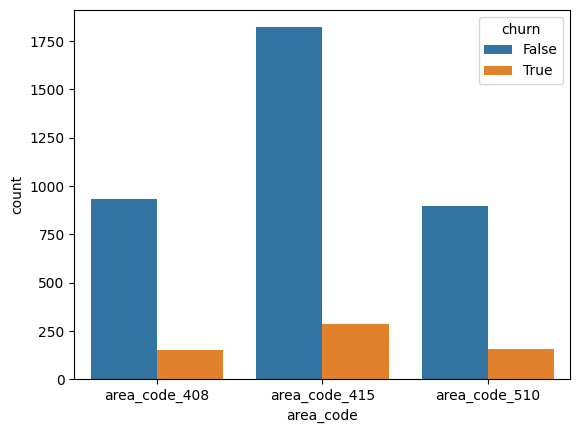

In [12]:
area_code = data_train['area_code'].astype('category')

sns.countplot(data=data_train, x=area_code, hue='churn');
crosstab_function(data_train,'area_code')

,international_plan,churn_no,churn_yes,total,churn Percentage
0,no,3423,431,3854,11.183186
1,yes,229,167,396,42.171717
2,All,3652,598,4250,14.070588


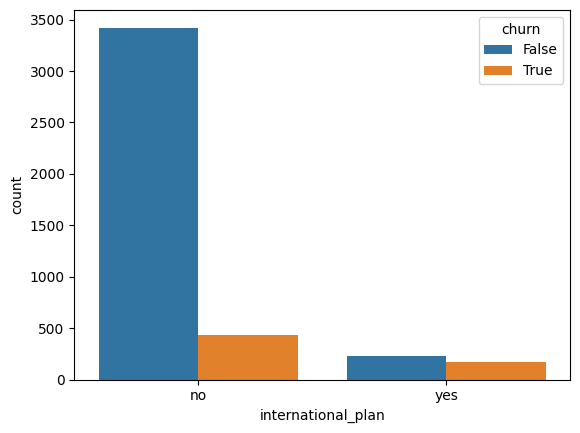

In [13]:
international_plan = data_train['international_plan'].astype('category')

sns.countplot(data=data_train, x=international_plan, hue='churn');
crosstab_function(data_train,'international_plan')

,voice_mail_plan,churn_no,churn_yes,total,churn Percentage
0,no,2622,516,3138,16.443595
1,yes,1030,82,1112,7.374101
2,All,3652,598,4250,14.070588


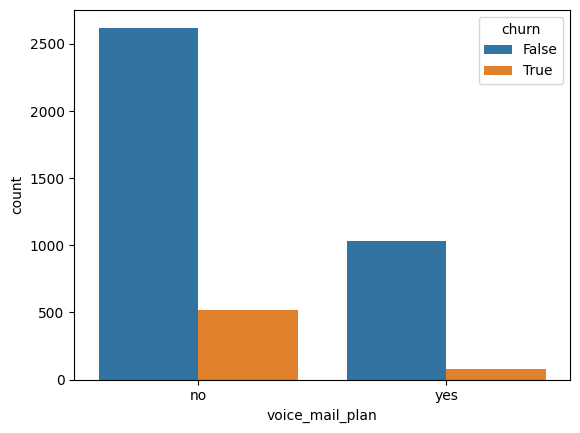

In [14]:
voice_mail_plan = data_train['voice_mail_plan'].astype('category')

sns.countplot(data=data_train, x=voice_mail_plan, hue='churn');
crosstab_function(data_train,'voice_mail_plan')

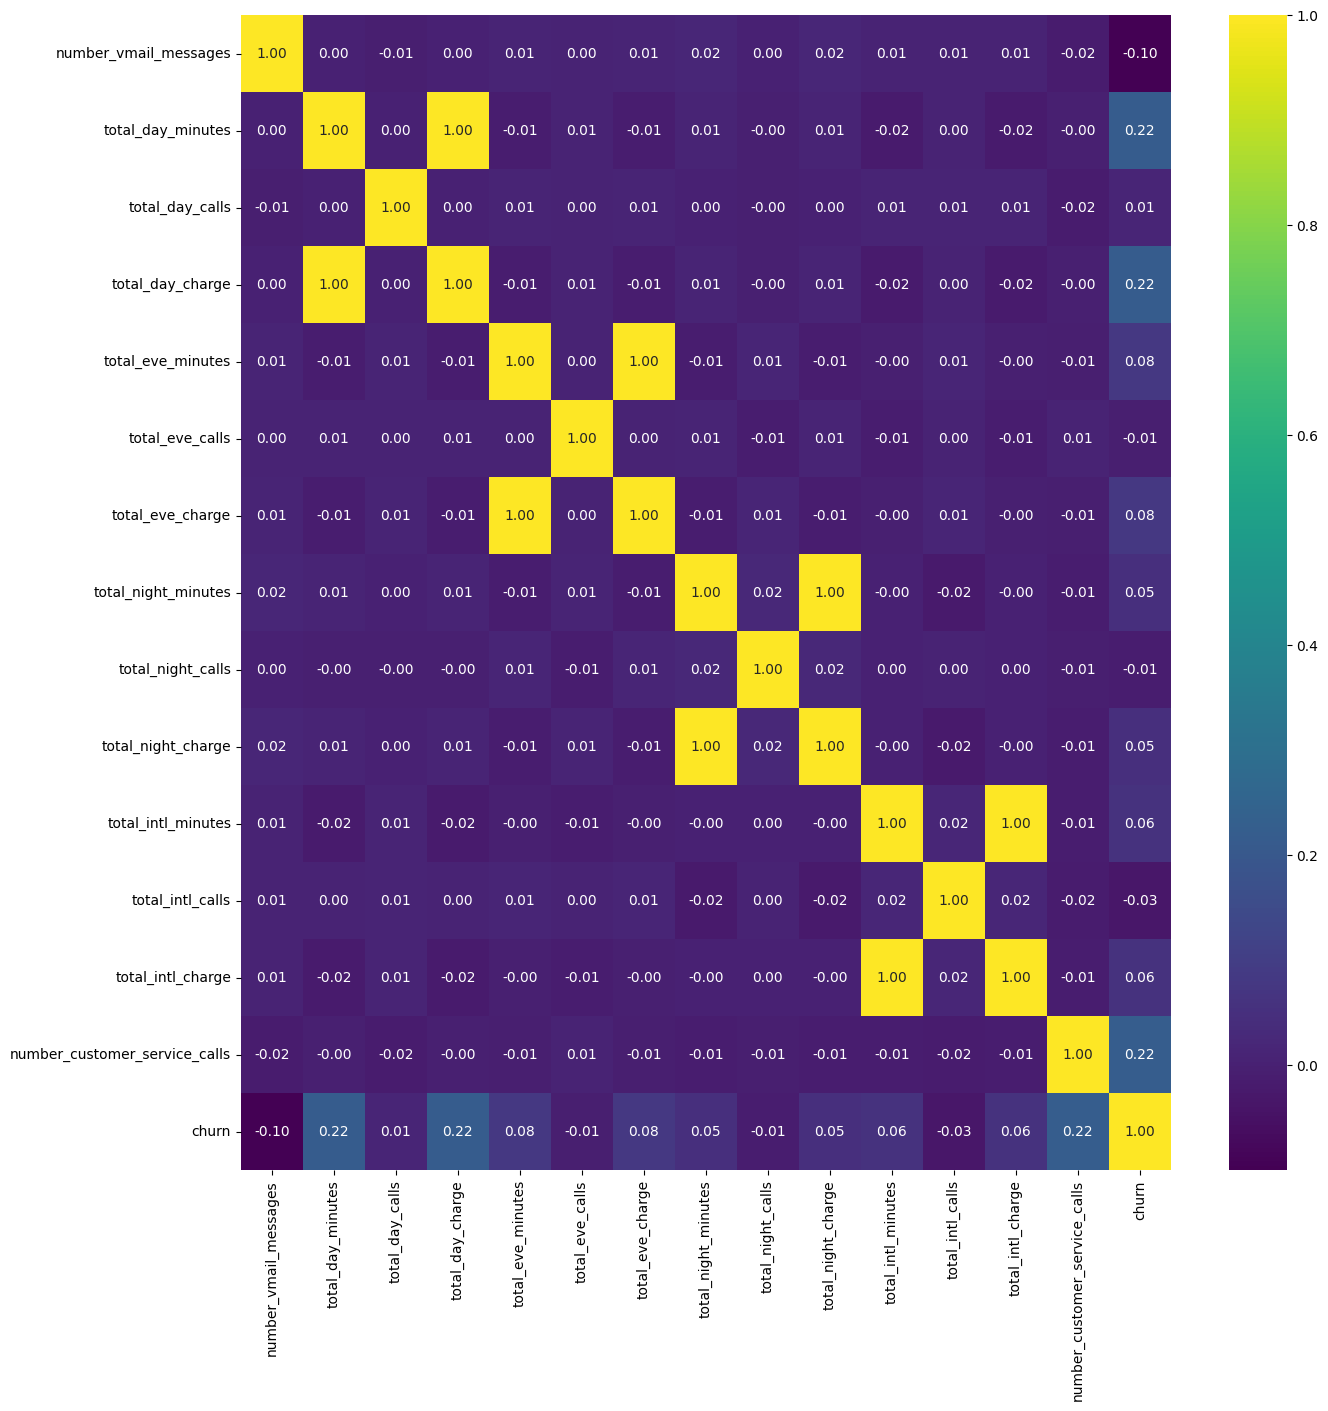

In [15]:
corr_train=data_train.drop(columns=['state','account_length','area_code', 'voice_mail_plan','international_plan']).corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(221, 11, as_cmap=True)
sns.heatmap( corr_train, annot=True, cmap='viridis', fmt='.2f');

### preprocessing data

1. filtering autlier
2. labelencoder data international plan, voice mail plan, churn
3. groupcat secara manual untuk number_customer_service_calls 
    x=0 adalah 0, x>=1 atau x<=3 adalah 1, x>=4  datau x<=6 adalah 2, dan selain itu other
4. category untuk number_vmail_messages
5. get_dummies untuk data number_vmail_messages, number_customer_service_call, area_code
6. pecah kolom churn menjadi X dan Y
7. class imbalance data train menngunakan SMOTE


In [16]:
#filtering outlier

cat_feature = ['state','international_plan', 'voice_mail_plan', 'number_customer_service_calls','area_code', 'number_vmail_messages']
num_feature = list(set(data_train.columns) - set(cat_feature)-{'churn'})

print(f'Jumlah baris sebelum memfilter outlier: {len(data_train)}')
filtered_entries = np.array([True] * len(data_train))
for col in num_feature:
    Q1 = data_train[col].quantile(0.25)
    Q3 = data_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data_train[col] >= low_limit) & (data_train[col] <= high_limit)) & filtered_entries

df_train = data_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3899


In [17]:
#labelencoder data international plan, voice mail plan, churn
le = LabelEncoder()

df_train['international_plan'] = le.fit_transform(df_train['international_plan'])
df_train['voice_mail_plan'] = le.fit_transform(df_train['voice_mail_plan'])
df_train['churn'] = le.fit_transform(df_train['churn'])

C:\Users\mduma\AppData\Local\Temp\ipykernel_4404\4257820655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['international_plan'] = le.fit_transform(df_train['international_plan'])
C:\Users\mduma\AppData\Local\Temp\ipykernel_4404\4257820655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['voice_mail_plan'] = le.fit_transform(df_train['voice_mail_plan'])
C:\Users\mduma\AppData\Local\Temp\ipykernel_4404\4257820655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy o

C:\Users\mduma\AppData\Local\Temp\ipykernel_4404\4109327214.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['number_customer_service_calls'] = df_train['number_customer_service_calls'].apply(groupcat)


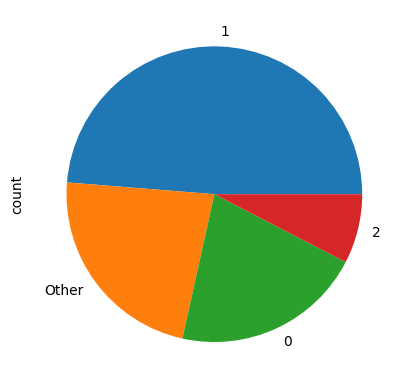

In [18]:
#groupcat kolom number customer servis calls
df_final_test=data_test
def groupcat(x):
    if x == 0:
        return '0'
    elif x >= 1 | x <= 3:
        return '1'
    elif x >= 4 | x <= 6:
        return '2'
    else:
        return 'Other'

df_train['number_customer_service_calls'] = df_train['number_customer_service_calls'].apply(groupcat)
df_final_test['number_customer_service_calls'] = df_final_test['number_customer_service_calls'].apply(groupcat)
df_train['number_customer_service_calls'].value_counts().plot(kind = 'pie');

C:\Users\mduma\AppData\Local\Temp\ipykernel_4404\3472697993.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['number_vmail_messages'] = df_train['number_vmail_messages'].apply(categorizing)


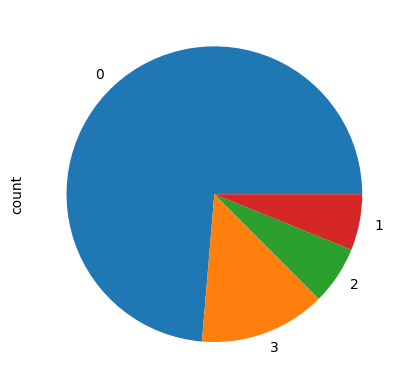

In [19]:
#categorykan kolom number_vmail_messages
def categorizing(x):
    if x == 0:
        return 0
    elif x < 24:
        return 1
    elif x < 29:
        return 2
    else:
        return 3

df_train['number_vmail_messages'] = df_train['number_vmail_messages'].apply(categorizing)
df_final_test['number_vmail_messages'] = df_final_test['number_vmail_messages'].apply(categorizing)
df_train['number_vmail_messages'].value_counts().plot(kind = 'pie');


In [20]:
feature_cat = ['number_vmail_messages', 'number_customer_service_calls', 'area_code']
df_final = pd.get_dummies(df_train, columns=feature_cat, drop_first=True)
data_test_final = pd.get_dummies(df_final_test, columns=feature_cat, drop_first=True)


In [21]:
drop=['churn','state']
X = df_final.drop(drop, axis = 1)
y = df_final['churn']

sm = SMOTE()
raw_X, raw_y = sm.fit_resample(X, y)

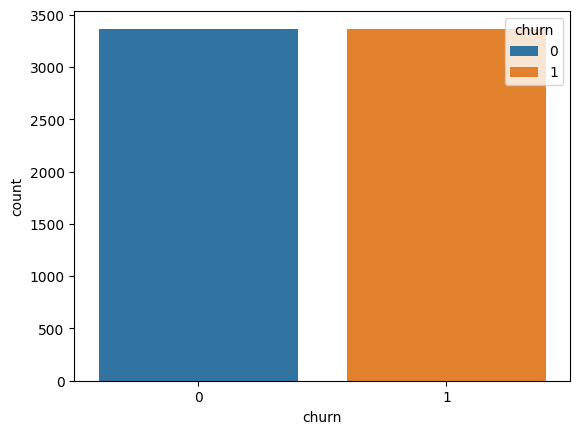

In [22]:
data_final_train = pd.concat([raw_X, raw_y], axis = 1)
sns.countplot(data=data_final_train, x=data_final_train['churn'], hue='churn');

In [23]:
#Feature Encoding
scaler = StandardScaler()
df_final_balance = data_final_train
df_final_balance[num_feature] = scaler.fit_transform(df_final_balance[num_feature])

In [24]:
#memecahkan kolom churn x dan y setelah di balance
X = df_final_balance.drop('churn', axis = 1)
y = df_final_balance['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Modeling data 

In [25]:
models = []
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy')))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)

    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,98.90,0.51,95.40,0.79
0,Decision Tree Classifier,91.66,1.33,91.65,1.38


In [26]:
# Model with Random Forest
rf = RandomForestClassifier (n_estimators = 81, random_state = 42)
# Training model
rf.fit (X_train, y_train)
y_rf = rf.predict(X_test)
print (pd.crosstab(y_test,y_rf, rownames=['Real'], colnames=['Predicted'], margins=True))
print(classification_report(y_test, y_rf))

Predicted    0    1   All
Real                     
0          663   26   689
1           22  636   658
All        685  662  1347
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       689
           1       0.96      0.97      0.96       658

    accuracy                           0.96      1347
   macro avg       0.96      0.96      0.96      1347
weighted avg       0.96      0.96      0.96      1347



In [27]:
# Model with Decision Tree
dt = DecisionTreeClassifier(random_state = 0)
# Training model
dt.fit (X_train, y_train)
y_dt = dt.predict(X_test)
print (pd.crosstab(y_test,y_dt, rownames=['Real'], colnames=['Predicted'], margins=True))
print(classification_report(y_test,y_dt))

Predicted    0    1   All
Real                     
0          625   64   689
1           50  608   658
All        675  672  1347
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       689
           1       0.90      0.92      0.91       658

    accuracy                           0.92      1347
   macro avg       0.92      0.92      0.92      1347
weighted avg       0.92      0.92      0.92      1347



In [28]:
# Feature Importance
rf.feature_importances_
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
number_customer_service_calls_2,0.172971
total_day_charge,0.135432
total_day_minutes,0.119517
voice_mail_plan,0.053343
total_eve_minutes,0.048069
total_eve_charge,0.046888
area_code_area_code_415,0.034263
total_night_minutes,0.033804
area_code_area_code_510,0.032854
total_night_charge,0.032212


### Prediction

In [29]:
df_test=data_test_final.drop(['id','state'], axis=1)
df_test

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_calls,total_intl_charge,number_vmail_messages_1,number_vmail_messages_2,number_vmail_messages_3,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_Other,area_code_area_code_415,area_code_area_code_510
0,128,no,yes,265.1,110,45.07,197.4,99,16.78,244.7,...,3,2.70,False,True,False,True,False,False,True,False
1,118,yes,no,223.4,98,37.98,220.6,101,18.75,203.9,...,6,1.70,False,False,False,False,False,False,False,True
2,62,no,no,120.7,70,20.52,307.2,76,26.11,203.0,...,6,3.54,False,False,False,False,True,False,True,False
3,93,no,no,190.7,114,32.42,218.2,111,18.55,129.6,...,3,2.19,False,False,False,True,False,False,False,True
4,174,no,no,124.3,76,21.13,277.1,112,23.55,250.7,...,5,4.19,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,no,no,119.4,99,20.30,226.3,97,19.24,202.7,...,7,3.05,False,False,False,False,False,False,True,False
746,73,no,no,177.2,118,30.12,270.5,84,22.99,241.8,...,2,3.32,False,False,False,True,False,False,False,False
747,152,no,no,184.2,90,31.31,256.8,73,21.83,213.6,...,2,3.97,False,False,False,True,False,False,True,False
748,61,no,no,140.6,89,23.90,172.8,128,14.69,212.4,...,4,3.67,False,False,False,True,False,False,True,False


In [30]:
df_test['international_plan'] = le.fit_transform(df_test['international_plan'])
df_test['voice_mail_plan'] = le.fit_transform(df_test['voice_mail_plan'])

In [31]:
df_test.head(2)

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_calls,total_intl_charge,number_vmail_messages_1,number_vmail_messages_2,number_vmail_messages_3,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_Other,area_code_area_code_415,area_code_area_code_510
0,128,0,1,265.1,110,45.07,197.4,99,16.78,244.7,...,3,2.7,False,True,False,True,False,False,True,False
1,118,1,0,223.4,98,37.98,220.6,101,18.75,203.9,...,6,1.7,False,False,False,False,False,False,False,True


In [32]:
predicted = rf.predict(df_test)

In [33]:
df_pred=pd.DataFrame({"churn_result": predicted})
data_predik = pd.concat([data_test, df_pred], axis=1) 

data_predik['churn'] = data_predik['churn_result'].map({ 0: 'no', 1: 'yes' })
data_predik.head(2)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn_result,churn
0,1,KS,128,area_code_415,no,yes,2,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.7,1,0,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.7,0,1,yes


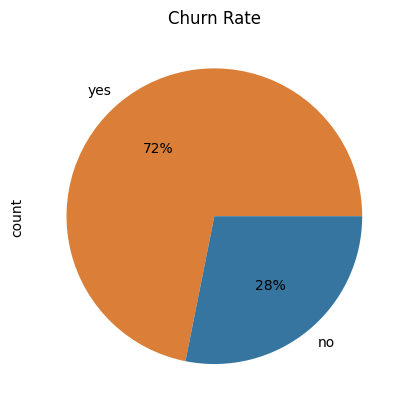

In [34]:
data_predik['churn'].value_counts().plot(title = 'Churn Rate', kind = 'pie', autopct='%1.0f%%', colors=['#DB7E37','#36759F']);
plt.savefig('churn_persen.png')

In [35]:
#save to csv
data_predik.to_csv('submission.csv', index=False)

In [36]:
data_predik['churn'] = data_predik['churn'].map(dict(yes=True, no=False))
data_predik['churn'].head()

0    False
1     True
2     True
3     True
4     True
Name: churn, dtype: bool

In [37]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['percentage'] = tab[1] / tab['All'] * 100
    tab.columns = [var, 'churn_no', 'churn_yes', 'total', 'churn Percentage']
    return tab

,area_code,churn_no,churn_yes,total,churn Percentage
0,area_code_408,44,129,173,74.566474
1,area_code_415,110,277,387,71.576227
2,area_code_510,57,133,190,70.000000
3,All,211,539,750,71.866667


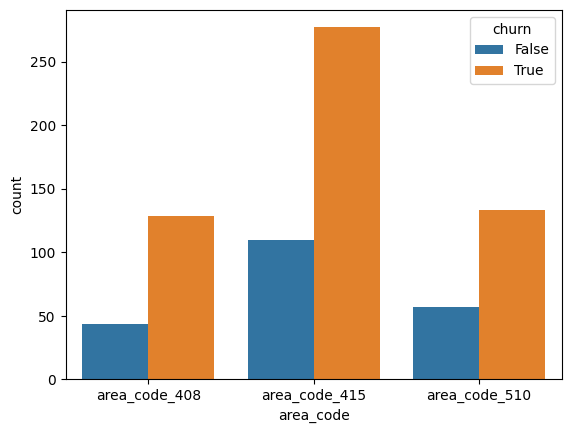

In [38]:
data = data_predik['area_code'].astype('category')
sns.countplot(data=data_predik, x=data, hue='churn');
crosstab_function(data_predik,'area_code')